In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choices
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
cols = ['Wife Age', 'Wife Edu', 'Husband Edu', 'No. Of Children', 'Wife Religion', 'Wife Working?', 'Husband Occupation', 'Standard of living', 'Media Exposure', 'Class']
df = pd.read_csv('cmc.data', names=cols)
df.head()

,Wife Age,Wife Edu,Husband Edu,No. Of Children,Wife Religion,Wife Working?,Husband Occupation,Standard of living,Media Exposure,Class
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [4]:
splitIndex = int(len(df)/3)

df = df.sample(frac = 1).reset_index(drop=True) #shuffle my dataset

trainSet = df[0:2*splitIndex]
#valSet = df[splitIndex:2*splitIndex]
testSet = df[2*splitIndex:len(df.index)]

#testSet = df[splitIndex:2*splitIndex]

print("Training size: ", trainSet.shape)
#print("Validation size: ", valSet.shape)
print("Testing size: ", testSet.shape)
print("Classes in train set: ", trainSet['Class'].unique())
#print("Classes in val set: ", valSet['Class'].unique())
print("Classes in test set: ", testSet['Class'].unique())

Training size:  (982, 10)
Testing size:  (491, 10)
Classes in train set:  [1 3 2]
Classes in test set:  [3 1 2]


In [5]:
#X_val, y_val = valSet.drop(columns='Class').copy().reset_index(drop=True), valSet['Class'].copy().reset_index(drop=True)
X_test, y_test = testSet.drop(columns='Class').copy().reset_index(drop=True), testSet['Class'].copy().reset_index(drop=True)

In [7]:
bts = []
n = []

for i in range(50, len(trainSet), 50):
    chosen = trainSet.sample(n=i, replace=True)
    bts.append(chosen)
    n.append(i)

In [11]:
for item in bts:
    print(item.shape)

(50, 10)
(100, 10)
(150, 10)
(200, 10)
(250, 10)
(300, 10)
(350, 10)
(400, 10)
(450, 10)
(500, 10)
(550, 10)
(600, 10)
(650, 10)
(700, 10)
(750, 10)
(800, 10)
(850, 10)
(900, 10)
(950, 10)
(1000, 10)


In [8]:
trees = []
scores = []

for i in range(len(bts)):
    tree = DecisionTreeClassifier(random_state=50)
    currentBTS = bts[i]
    X_train, y_train = currentBTS.drop(columns='Class').copy().reset_index(drop=True), currentBTS['Class'].copy().reset_index(drop=True)

    tree.fit(X_train, y_train)
    score = accuracy_score(y_test, tree.predict(X_test))
    
    trees.append(tree)
    scores.append(score)

In [7]:
print(scores)

[0.46435845213849286, 0.40529531568228105, 0.45417515274949083, 0.4745417515274949, 0.45824847250509165, 0.49490835030549896, 0.4419551934826884, 0.4725050916496945, 0.4684317718940937]


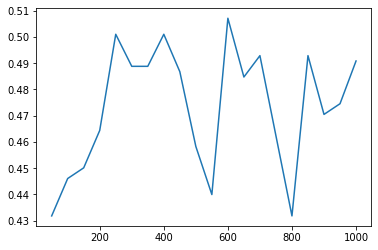

In [9]:
plt.plot(n, scores)
plt.show()